# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>



### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

# Data Exploration & Cleaning


In [5]:
df_data.describe
df_data.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

Checking if there is any Nobels in my country:

In [7]:
df_data.sort_values("year",ascending= True)
df_data[df_data.birth_country == "Mexico"]


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
533,1982,Peace,The Nobel Peace Prize 1982,NaN,1/2,Individual,Alfonso García Robles,1911-03-20,Zamora,Mexico,Mexico,Male,NaN,NaN,NaN,MEX
606,1990,Literature,The Nobel Prize in Literature 1990,"""for impassioned writing with wide horizons, c...",1/1,Individual,Octavio Paz,1914-03-31,Mexico City,Mexico,Mexico,Male,NaN,NaN,NaN,MEX
651,1995,Chemistry,The Nobel Prize in Chemistry 1995,"""for their work in atmospheric chemistry, part...",1/3,Individual,Mario J. Molina,1943-03-19,Mexico City,Mexico,Mexico,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,MEX


### Check for Duplicates

In [ ]:
df_data.duplicated().any()

False

### Check for NaN Values

In [ ]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [ ]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


#### Convert Year and Birth Date to Datetime

In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.prize_share

0      1/1
1      1/1
2      1/1
3      1/2
4      1/2
      ... 
957    1/3
958    1/1
959    1/4
960    1/4
961    1/2
Name: prize_share, Length: 962, dtype: object

#### Add a Column with the Prize Share as a Percentage

In [ ]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

In [ ]:
df_data.groupby("year").count()

,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
year,,,,,,,,,,,,,,,,
1901,6,6,4,6,6,6,6,6,6,6,6,3,3,3,6,6
1902,7,7,5,7,7,7,7,7,7,7,7,4,4,4,7,7
1903,7,7,6,7,7,7,7,7,7,7,7,4,4,4,7,7
1904,6,6,5,6,6,6,5,5,5,5,5,3,3,3,5,6
1905,5,5,4,5,5,5,5,5,5,5,5,3,3,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,11,11,11,11,11,11,11,11,11,11,11,9,9,9,11,11
2017,12,12,12,12,12,12,11,11,11,11,11,10,7,7,11,12
2018,13,13,13,13,13,13,13,13,13,13,13,10,10,10,13,13


Some of my questions:

1. What is the average age that the prize was won?
2. What is the top 5 counties with most Nobels?
3. Which organization won the most prizes?  

In [19]:
df_data["year_born"] = pd.DatetimeIndex(df_data.birth_date).year
df_data["age"] = df_data.year - df_data.year_born
df_data.age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: age, dtype: float64

In [11]:
df_data.groupby("birth_country_current").agg({"prize": "count"}).sort_values("prize", ascending = False)

,prize
birth_country_current,
United States of America,281
United Kingdom,105
Germany,84
France,57
Sweden,29
...,...
Iceland,1
Madagascar,1
Indonesia,1


In [ ]:
df_data.groupby("organization_name").agg({"prize": "count"}).sort_values("prize", ascending = False)

,prize
organization_name,
University of California,40
Harvard University,29
Stanford University,23
Massachusetts Institute of Technology (MIT),21
University of Chicago,20
...,...
Long Term Capital Management,1
Madrid University,1
Mainz University,1


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [ ]:
biology = df_data.sex.value_counts()
biology

Male      876
Female     58
Name: sex, dtype: int64

In [ ]:
fig = px.pie(labels=biology.index,
             values=biology.values,
             title="Percentage of Male vs. Female Winners",
             names=biology.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


# Who were the first 3 Women to Win the Nobel Prize?



In [13]:
df_data[df_data.sex == "Female"].sort_values("year")

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Italy,Female,NaN,NaN,NaN,ITA
141,1928,Literature,The Nobel Prize in Literature 1928,"""principally for her powerful descriptions of ...",1/1,Individual,Sigrid Undset,1882-05-20,Kalundborg,Denmark,Denmark,Female,NaN,NaN,NaN,DNK
160,1931,Peace,The Nobel Peace Prize 1931,NaN,1/2,Individual,Jane Addams,1860-09-06,"Cedarville, IL",United States of America,United States of America,Female,NaN,NaN,NaN,USA
179,1935,Chemistry,The Nobel Prize in Chemistry 1935,"""in recognition of their synthesis of new radi...",1/2,Individual,Irène Joliot-Curie,1897-09-12,Paris,France,France,Female,Institut du Radium,Paris,France,FRA
198,1938,Literature,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",1/1,Individual,Pearl Buck,1892-06-26,"Hillsboro, WV",United States of America,United States of America,Female,NaN,NaN,NaN,USA
218,1945,Literature,The Nobel Prize in Literature 1945,"""for her lyric poetry which, inspired by power...",1/1,Individual,Gabriela Mistral,1889-04-07,Vicuña,Chile,Chile,Female,NaN,NaN,NaN,CHL


# Find the Repeat Winners



In [ ]:
df_data.groupby("full_name").agg({"prize": "count"}).sort_values("prize", ascending = False)

,prize
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
"Marie Curie, née Sklodowska",2
Linus Carl Pauling,2
Frederick Sanger,2
John Bardeen,2
...,...
Grazia Deledda,1
Gregg Semenza,1
Guglielmo Marconi,1


# Number of Prizes per Category


In [ ]:
prizes_per_category = df_data.category.value_counts()
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')

v_bar.update_layout(xaxis_title='Nobel Prize Category',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

**As an economist I want to ansewer the followiong**:
* When was the first prize in the field of Economics awarded?


In [ ]:
df_data[df_data.category == "Economics"].sort_values("year")

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,year_born,age
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50,"1,903.00",66.00
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50,"1,895.00",74.00
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00,"1,915.00",55.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.00,"1,901.00",70.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50,"1,904.00",68.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Abhijit Banerjee,1961-02-21,Mumbai,India,India,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,IND,0.33,"1,961.00",58.00
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Esther Duflo,1972-10-25,Paris,France,France,Female,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FRA,0.33,"1,972.00",47.00
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Michael Kremer,1964-11-12,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,0.33,"1,964.00",55.00
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,0.50,"1,948.00",72.00


# Male and Female Winners by Category



In [ ]:
sex_per_category = df_data.groupby(["sex", "category"], as_index = False).agg({"prize": "count"}).sort_values("prize", ascending = False)

In [ ]:

v_bar = px.bar(
      x = sex_per_category.category,
      y = sex_per_category.prize,
      color = sex_per_category.sex,
      color_continuous_scale='Aggrnyl',
      title='Number of Prizes Awarded per Category (per sex)')

v_bar.update_layout(
    xaxis_title='Nobel Prize Category',
    coloraxis_showscale=False,
    yaxis_title='Number of Prizes'
)

v_bar.show()

# Number of Prizes Awarded Over Time



In [ ]:
prize_per_year = df_data.groupby("year").agg({"prize": "count"}).sort_values("year", ascending = True)
moving_average = prize_per_year.rolling(window=5).mean()
prize_per_year

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


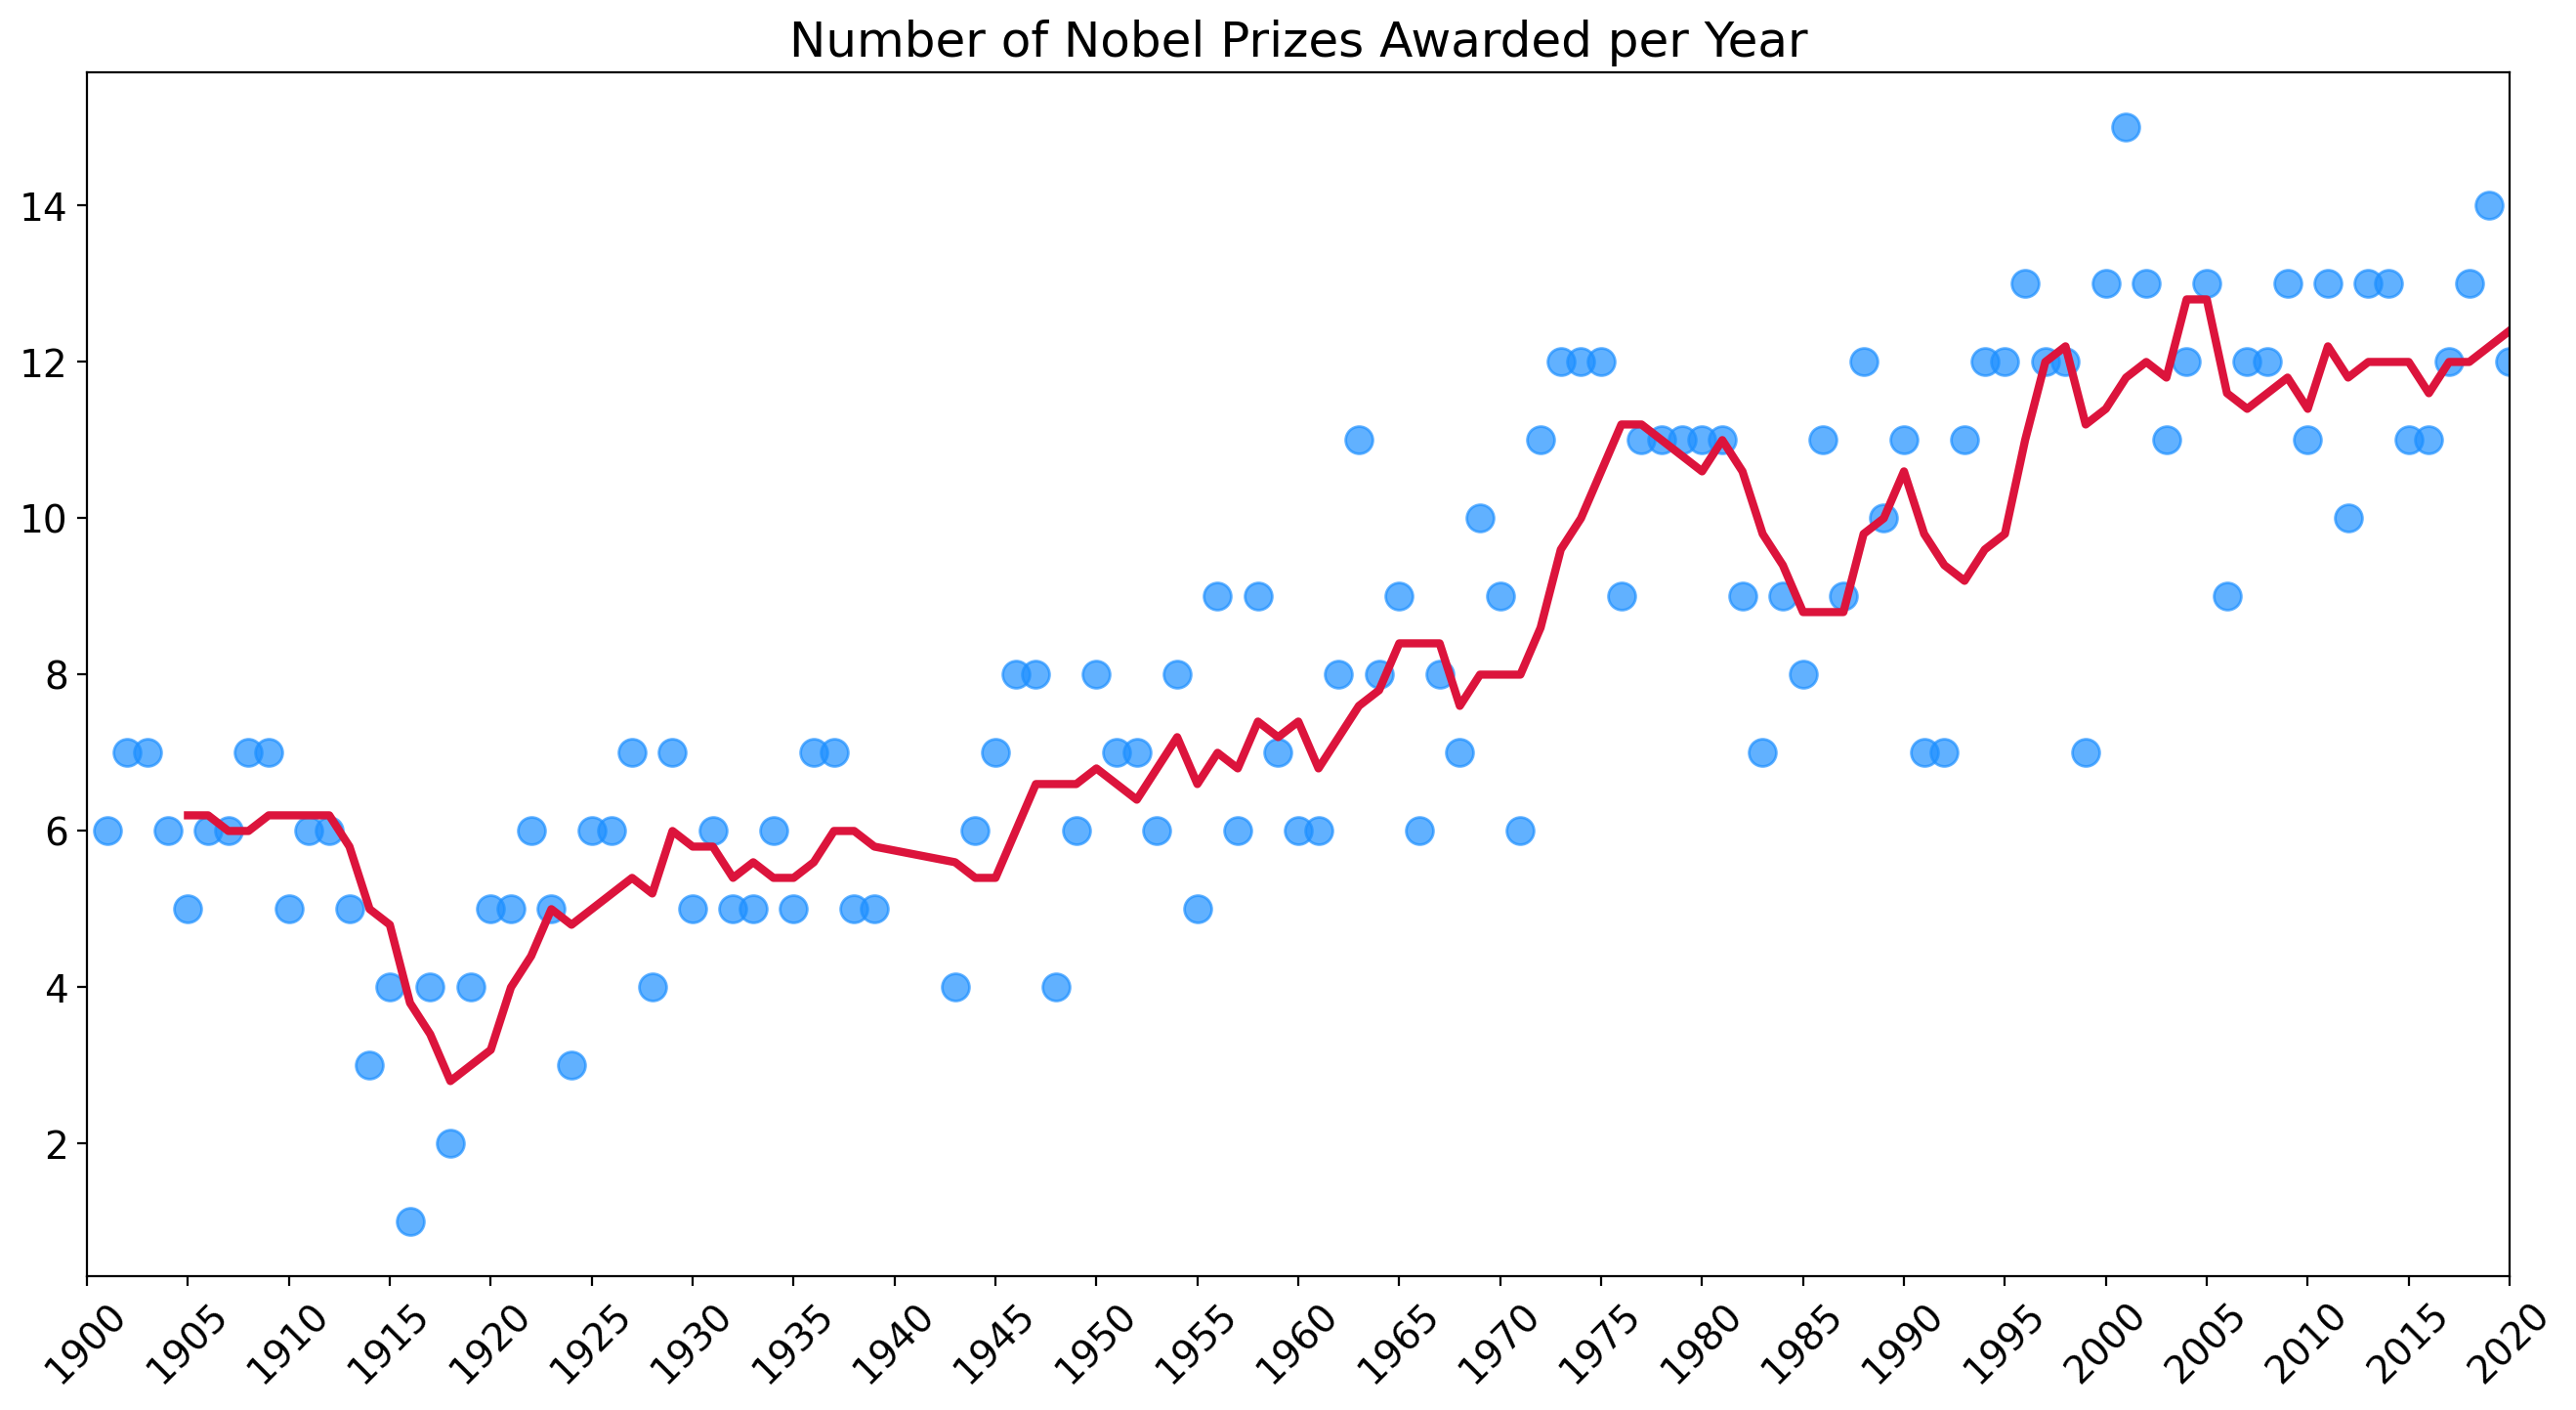

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)

ax.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(prize_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)

plt.show()


# Are More Prizes Shared Than Before?



In [ ]:
share_per_year = df_data.groupby("year").agg({"share_pct": "mean"}).sort_values("year", ascending = True)
share_roll = share_per_year.rolling(window=5).mean()


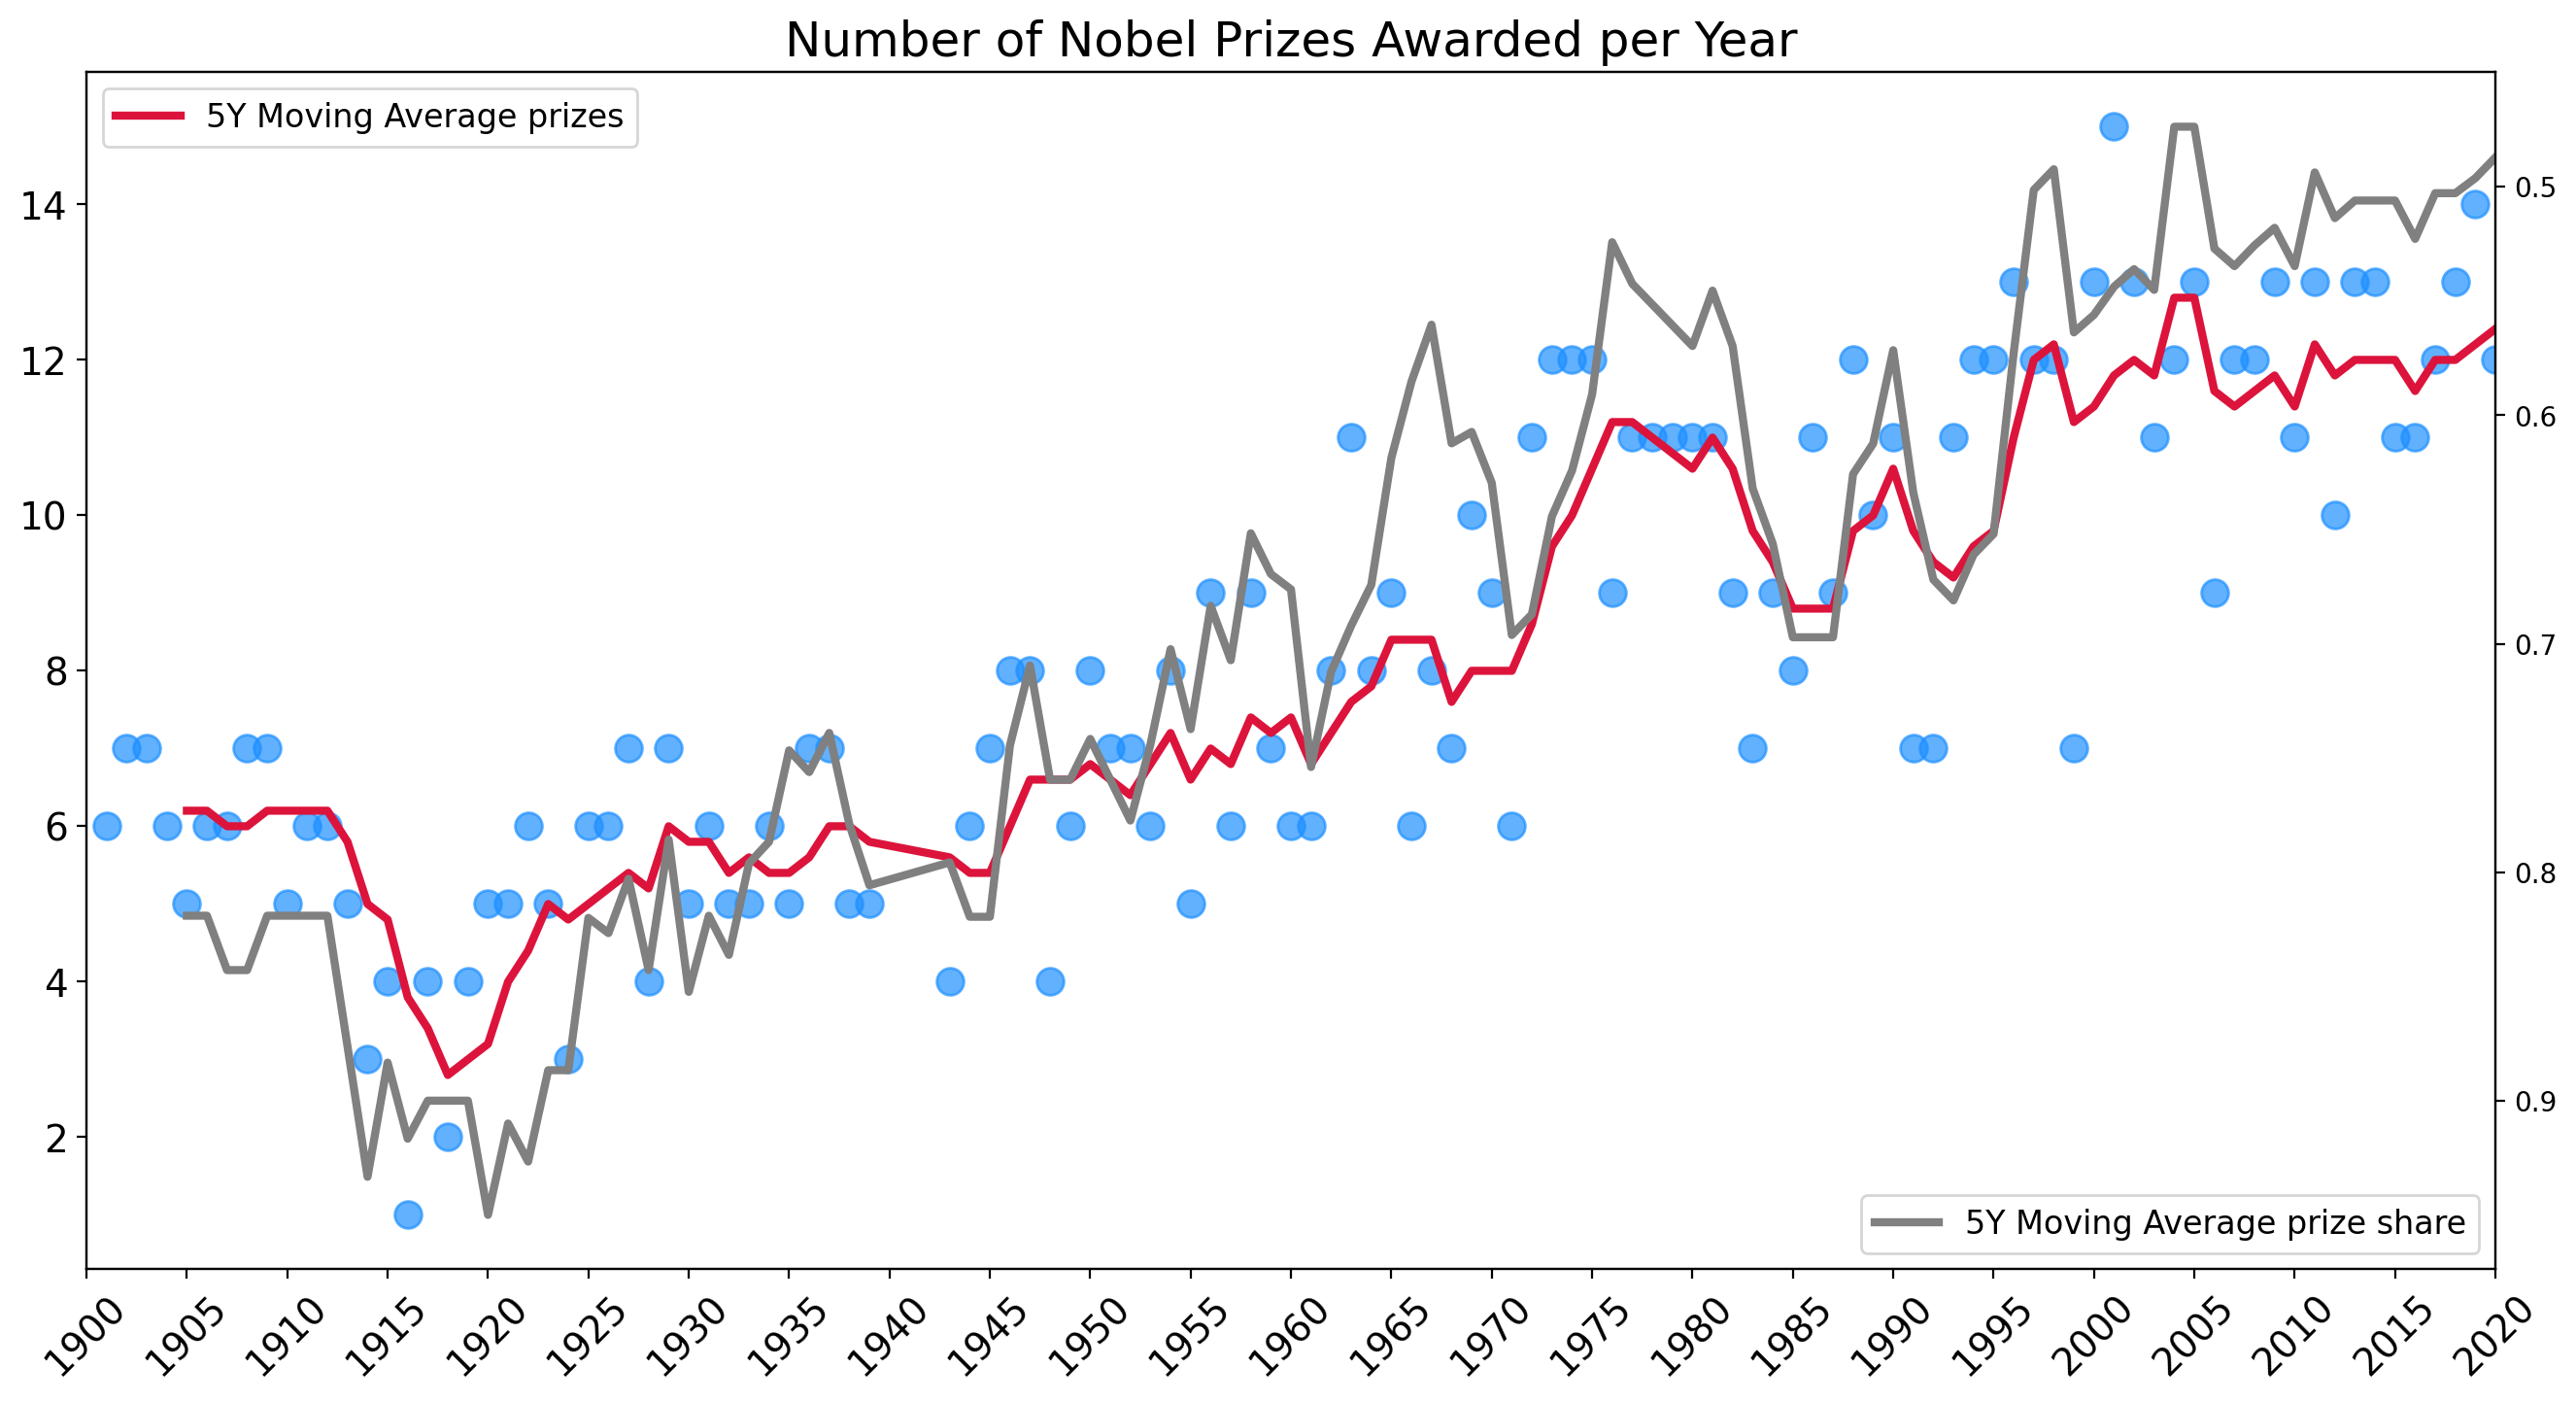

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax = plt.gca() # get current axis
ax2 = plt.twinx()
ax.set_xlim(1900, 2020)

# Can invert axis
ax2.invert_yaxis()

ax.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(prize_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,
        label = "5Y Moving Average prizes",)

ax2.plot(share_roll.index,
        share_roll.values,
        c='grey',
        linewidth=3,
        label = "5Y Moving Average prize share",)


ax.legend(loc='upper left', fontsize=12)  # Line label for the first axis
ax2.legend(loc='lower right', fontsize=12)  # Line label for the second axis

plt.show()

# The Countries with the Most Nobel Prizes

In [15]:
top20_countries = share_per_year = df_data.groupby("birth_country_current").agg({"prize": "count"}).sort_values("prize", ascending = False)
top20_countries =top20_countries.head(20)
top20_countries

,prize
birth_country_current,
United States of America,281
United Kingdom,105
Germany,84
France,57
Sweden,29
Japan,27
Poland,27
Russia,26
Canada,20


In [ ]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.index,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')

h_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=False)



h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country


In [ ]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'],
                               as_index=False).agg({'prize': "count"})

In [ ]:
fig = px.choropleth(df_countries, locations="ISO",
                    color="prize", # lifeExp is a column of gapminder
                    hover_name="birth_country_current", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter)


fig.update_layout(coloraxis_showscale=True,)

fig.show()

# In Which Categories are the Different Countries Winning Prizes?



In [ ]:
df_category = df_data.groupby(['birth_country_current', 'category'],
                               as_index=False).agg({'prize': "count"})


df_category = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': 'count'})
merged_df = pd.merge(df_countries, df_category, on='birth_country_current')
merged_df = merged_df.rename(columns={'prize_x': 'total_prize', 'prize_y': 'cat_prize'})
country_totals = merged_df.groupby('birth_country_current')['total_prize'].sum()
top_20_countries = country_totals.nlargest(19).index.tolist()

top_20_df = merged_df[merged_df['birth_country_current'].isin(top_20_countries)]
top_20_df = top_20_df.sort_values('total_prize', ascending=True)
top_20_df

,birth_country_current,ISO,total_prize,category,cat_prize
86,Hungary,HUN,9,Physics,2
82,Hungary,HUN,9,Chemistry,3
83,Hungary,HUN,9,Economics,1
84,Hungary,HUN,9,Literature,1
85,Hungary,HUN,9,Medicine,2
...,...,...,...,...,...
201,United States of America,USA,281,Chemistry,55
202,United States of America,USA,281,Economics,49
203,United States of America,USA,281,Literature,10
204,United States of America,USA,281,Medicine,78


In [ ]:
cat_cntry_bar = px.bar(x=top_20_df.cat_prize,
                       y=top_20_df.birth_country_current,
                       color=top_20_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes',
                            yaxis_title='Country')
cat_cntry_bar.show()

In [ ]:
df_category = df_data.groupby(['birth_country_current', 'category'],
                               as_index=False).agg({'prize': "count"})
df_category

,birth_country_current,category,prize
0,Algeria,Literature,1
1,Algeria,Physics,1
2,Argentina,Medicine,2
3,Argentina,Peace,2
4,Australia,Chemistry,1
...,...,...,...
206,United States of America,Physics,70
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


### Number of Prizes Won by Each Country Over Time



In [ ]:
prize_per_year = df_data.groupby(["year", "birth_country_current"], as_index=False).agg(
    total_prizes = pd.NamedAgg(column="prize", aggfunc = "count")).sort_values("year")
prize_per_year["cumulative"] = prize_per_year.groupby('birth_country_current')['total_prizes'].cumsum()

# Get the top 10 countries based on the maximum cumulative count of prizes
top_10_countries = prize_per_year.groupby('birth_country_current')['cumulative'].max().nlargest(10).index

# Filter the data to include only the top 10 countries
prize_per_year_top_10 = prize_per_year[prize_per_year['birth_country_current'].isin(top_10_countries)]

prize_per_year_top_10

,year,birth_country_current,total_prizes,cumulative
0,1901,France,2,2
1,1901,Germany,1,1
3,1901,Poland,1,1
5,1902,Germany,2,3
10,1903,France,2,4
...,...,...,...,...
617,2019,Germany,1,83
625,2020,United Kingdom,2,105
623,2020,France,1,57
624,2020,Germany,1,84


In [ ]:
# Plot the graph with only the top 10 countries
fig = px.line(prize_per_year_top_10, x="year", y="cumulative", color='birth_country_current')

# Add annotations for country names on the right side of the lines
for country in top_10_countries:
    last_value = prize_per_year_top_10[prize_per_year_top_10['birth_country_current'] == country].iloc[-1]
    fig.add_annotation(x=last_value['year'], y=last_value['cumulative'],
                       text=country, showarrow=False,
                       xanchor='left', yanchor='middle', font=dict(color='black', size=10))

# Remove the legend
fig.update_layout(showlegend=False)

# Customize line colors
color_palette = px.colors.qualitative.Plotly[:10]
for i, country in enumerate(top_10_countries):
    fig.update_traces(selector=dict(name=country), line=dict(color=color_palette[i]))

# Add axis labels and a title
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Cumulative Count of Prizes",
    title="Cumulative Count of Prizes by Country over Time"
)

# Adjust the layout for better readability
fig.update_layout(
    plot_bgcolor='lightgrey',
    margin=dict(t=50, r=50, b=50, l=50),
    font=dict(size=12)
)

# Display the graph
fig.show()

# What are the Top Research Organisations?


In [ ]:
prizes_org = df_data.groupby(["organization_name", "organization_country"], as_index=False).agg(
    total_prizes=pd.NamedAgg(column="prize", aggfunc="count")).sort_values("total_prizes", ascending=False)

prizes_org_top_20 = prizes_org.head(20)

prizes_org_top_20


,organization_name,organization_country,total_prizes
196,University of California,United States of America,40
68,Harvard University,United States of America,29
167,Stanford University,United States of America,23
117,Massachusetts Institute of Technology (MIT),United States of America,21
198,University of Chicago,United States of America,20
197,University of Cambridge,United Kingdom,18
26,California Institute of Technology (Caltech),United States of America,17
38,Columbia University,United States of America,17
146,Princeton University,United States of America,15
119,Max-Planck-Institut,Germany,13


In [ ]:
prizes_org_bar = px.bar(x=prizes_org_top_20.total_prizes,
                       y=prizes_org_top_20.organization_name,
                       color=prizes_org_top_20.organization_country,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')

prizes_org_bar.update_layout(xaxis_title='Number of Prizes',
                             yaxis_title='University',
                             yaxis_categoryorder='total ascending')  # Sort y-axis in ascending order

prizes_org_bar.show()

# Which Cities Make the Most Discoveries?


In [ ]:
prizes_city = df_data.groupby(["organization_city", "organization_country"], as_index=False).agg(
    total_prizes=pd.NamedAgg(column="prize", aggfunc="count")).sort_values("total_prizes", ascending=False)

prizes_city_top_20 = prizes_city.head(20)
prizes_city_top_20

,organization_city,organization_country,total_prizes
34,"Cambridge, MA",United States of America,50
121,"New York, NY",United States of America,45
33,Cambridge,United Kingdom,31
92,London,United Kingdom,27
128,Paris,France,25
156,"Stanford, CA",United States of America,24
12,"Berkeley, CA",United States of America,21
39,"Chicago, IL",United States of America,20
135,"Princeton, NJ",United States of America,19
129,"Pasadena, CA",United States of America,17


In [ ]:
prizes_city_bar = px.bar(x=prizes_city_top_20.total_prizes,
                       y=prizes_city_top_20.organization_city,
                       color=prizes_city_top_20.organization_country,
                       orientation='h',
                       title='Top 20 Cities by Number of Prizes')

prizes_city_bar.update_layout(xaxis_title='Number of Prizes',
                             yaxis_title='City',
                             yaxis_categoryorder='total ascending')  # Sort y-axis in ascending order

prizes_city_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities


In [ ]:
birth_city = df_data.groupby(["birth_city", "birth_country"], as_index=False).agg(
    total_prizes=pd.NamedAgg(column="prize", aggfunc="count")).sort_values("total_prizes", ascending=False)

birth_city_top_20 = birth_city.head(20)
birth_city_top_20

,birth_city,birth_country,total_prizes
393,"New York, NY",United States of America,53
429,Paris,France,26
322,London,United Kingdom,19
116,"Chicago, IL",United States of America,12
587,Vienna,Austria,11
48,Berlin,Germany,9
607,"Washington, DC",United States of America,8
78,"Brooklyn, NY",United States of America,8
65,"Boston, MA",United States of America,8
374,Munich,Germany,6


In [ ]:
prizes_city_bar = px.bar(x=birth_city_top_20.total_prizes,
                       y=birth_city_top_20.birth_city,
                       color=birth_city_top_20.birth_country,
                       orientation='h',
                       title='Top 20 Birth Cities by Number of Prizes')

prizes_city_bar.update_layout(xaxis_title='Number of Prizes',
                             yaxis_title='City',
                             yaxis_categoryorder='total ascending')  # Sort y-axis in ascending order

prizes_city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation


In [ ]:
prizes_regions = df_data.groupby(["organization_country", "organization_city", "organization_name"], as_index=False).agg(
    total_prizes=pd.NamedAgg(column="prize", aggfunc="count")).sort_values("total_prizes", ascending=False)

prizes_regions

,organization_country,organization_city,organization_name,total_prizes
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [ ]:
burst = px.sunburst(prizes_regions,
                    path=['organization_country', 'organization_city', 'organization_name'],
                    values='total_prizes',
                    title='Where do Discoveries Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Patterns in the Laureate Age at the Time of the Award



In [ ]:
df_data.age

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Name: age, Length: 962, dtype: float64

### Who were the oldest and youngest winners?



In [22]:
df_data[df_data.laureate_type=="Individual"].sort_values("age")

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,year_born,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,"1,997.00",17.00
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,Individual,William Lawrence Bragg,1890-03-31,Adelaide,Australia,Australia,Male,Victoria University,Manchester,United Kingdom,AUS,"1,890.00",25.00
932,2018,Peace,The Nobel Peace Prize 2018,“for their efforts to end the use of sexual vi...,1/2,Individual,Nadia Murad,1993-07-02,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ,"1,993.00",25.00
171,1933,Physics,The Nobel Prize in Physics 1933,"""for the discovery of new productive forms of ...",1/2,Individual,Paul Adrien Maurice Dirac,1902-08-08,Bristol,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,"1,902.00",31.00
166,1932,Physics,The Nobel Prize in Physics 1932,"""for the creation of quantum mechanics, the ap...",1/1,Individual,Werner Karl Heisenberg,1901-12-05,Würzburg,Germany,Germany,Male,Leipzig University,Leipzig,Germany,DEU,"1,901.00",31.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,Individual,Lloyd S. Shapley,1923-06-02,"Cambridge, MA",United States of America,United States of America,Male,University of California,"Los Angeles, CA",United States of America,USA,"1,923.00",89.00
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,"1,931.00",89.00
794,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,RUS,"1,917.00",90.00
933,2018,Physics,The Nobel Prize in Physics 2018,“for the optical tweezers and their applicatio...,1/2,Individual,Arthur Ashkin,1922-09-02,"New York, NY",United States of America,United States of America,Male,Bell Laboratories,"Holmdel, NJ",United States of America,USA,"1,922.00",96.00


### Descriptive Statistics for the Laureate Age at Time of Award


<Axes: xlabel='age', ylabel='Count'>

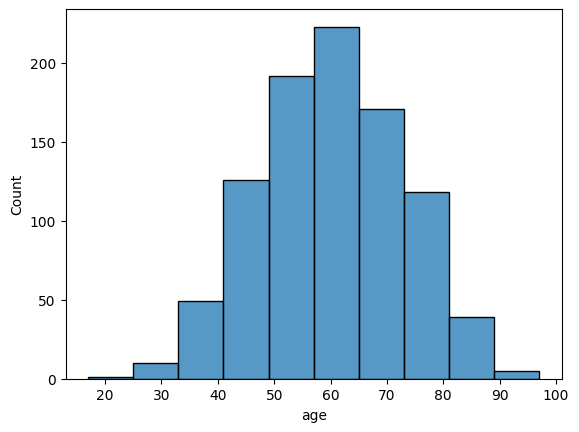

In [ ]:
sns.histplot(data=df_data, x="age", bins=10)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?



<Axes: xlabel='year', ylabel='age'>

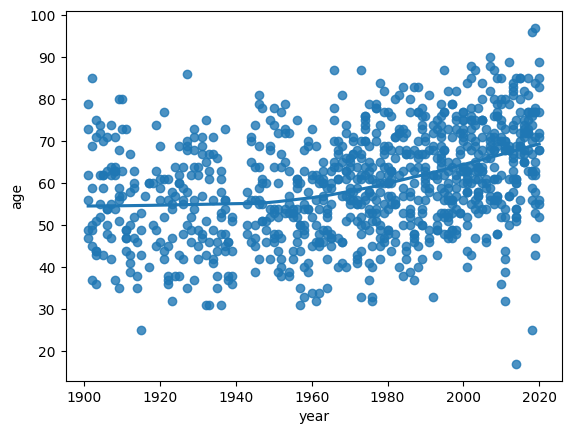

In [ ]:
sns.regplot(data=df_data, x="year", y="age", lowess=True)